# Spotting Stellar-Mass Black Holes in Star Clusters

*Group 4*: Edoardo Antonaci, Francesco Mazza, Fabio Menegazzo, Leonardo Salicari

## Introduction

The merging of the so called *stellar black holes*, i.e. formed from the gravitational collapse of a star, is one of the sources of Gravitational Waves detected by ground-based detectors. Therefore, the study of their properties and dynamics inside star clusters is of foremost importance.

A way to tackle this study is by means of simulations. In this work, we deal with star clusters' simulations, i.e. $N$ -body simulations, generated using the framework [Nbody6++GPU](https://github.com/nbodyx/Nbody6ppGPU). We have a set of $131$ star clusters characterized by different initial total mass, a.k.a. sum of all body's masses, and metallicity, i.e. abundance of elements heavier than Hydrogen and Helium. For each, we are interested in black holes and their properties. Notice that during the simulation, the black holes mass can't change.

A visual example of a star cluster simulation, taken from [[2]](http://faculty.wcas.northwestern.edu/aaron-geller/visuals.html), is inserted below: specifically, the video shows a NBODY6 simulation focusing on the evolution of a star cluster similar to the Pleiades.

The following project is divided in two macro parts:
1. Gathering the relevant output's files of the simulation and extract black holes data
2. Analyzing the obtained dataset and presenting the results

Specifically, we'll present information about:
* Mass function, i.e. black holes mass distribution, for different time steps (snapshots) of the simulation
* Number of black holes found in a binary system, the one that can produce during a merging phenomenon gravitational waves.
* Origin of such binary black holes (BBH)

In [1]:
# All packages used
from IPython.display import IFrame
import numpy as np
from os import listdir # to read directory's content
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import AutoMinorLocator #to set minor ticks

In [2]:
# Animation of a simulated star cluster
display(IFrame("https://northwestern.app.box.com/s/kj63sip2dojukkimrz1q0zq1xmwu9a5h", width=900, height=650))

## Obtaining data

**Disclaimer**: this first part is meant to be run while the present jupyter notebook is on the Virtual Machine (VM) provided by *CloudVeneto*. Due to some tecnical problems, the actual data used in the analisys isn't in the VM but rather in another server. So, what follows before the actual data-analysis is only a *demostration* of how the data is collected and put in a `Dataframe` as if all the datasets were in *CloudVeneto*. The actual data from the bigger set of clusters is obtained in the very same way (of course running the code in the appropriate server) and saved in `.csv` files (more details later).

### Collecting relevant files

The idea is to collect the `single.40_X` and `binary.40_X` files from *all* simulations performed and related to a set of times (expressed in Myr) decided by the user, which are the times at which a "snapshot" of the system is taken, i.e. an output file is produced. Considering all star clusters allow us to have more statistics, i.e. more black holes, for each snapshot. 

`X` in each `single.40_X` and `binary.40_X` files is the time in simulation units, which are express in *Nbody units*, for more details check out the [official documentation](https://github.com/nbodyx/Nbody6ppGPU/tree/master/doc) of *nbody6++GPU*, Chapter 12. Basically, different initial total mass implies different conversion factor between time in Myr and simulation's step, hence we have simulations which last $100$ Myr each but characterized by different simulation's steps.
As a consequence, for a particular time, e.g. 10 Myr, we cannot take the corresponding `single.40_X` and `binary.40_X` files at that precise instant, but we need to take the closest one. This is fully described later on.

In this first part, the program reads the directory with data and extract from `cluster_name.output` the $T^*$ value, used to convert from N-body units to SI units, for each simulation of star clusters.
In the following code, we used the name `clusters` to refer to different simulations with different initial conditions (the structrure of this object is explained in the code).

In [3]:
# make a list of all star clusters in the "/data/stellar_blackholes/10_clusters/" 
# and /data/stellar_blackholes/ directories

# list for the first set of cluster: preprocessing
pathfile = '/data/stellar_blackholes/10_clusters/' # data's absolute path in the VM
dir_clusters1 = listdir(pathfile) # list of all files and dirs in pathfile
dir_clusters1.remove('plots') # removing plots folder
dir_clusters1 = [a for a in dir_clusters1 if not a[-4:]=='.zip'] # removing all .zips

# list for the new set of cluster: preprocessing
pathfile_new = '/data/stellar_blackholes/'
dir_clusters2 = listdir(pathfile_new)
dir_clusters2.remove('10_clusters') 
dir_clusters2.remove('M1000_D2.3_Z0.002') # already present in dir_clusters1
dir_clusters2.remove('.ipynb_checkpoints')

# create a unique list: each element is [directory name, path/to/file]
clusters = []
for cl in dir_clusters1:
    clusters.append([cl,pathfile]) # [directory name, path to it]
for cl in dir_clusters2:
    clusters.append([cl,pathfile_new])

# Print to display order
for a in clusters:
    print(a)


# extract from each simulation T*

t_star = [] # list of T*, will be in the same order of clusters
for cl in clusters:
    
    # taking output file's absolute path
    # cl[1] -> path to directory
    # cl[0] -> name of the simulation
    output_file = cl[1] + cl[0] + '/' + cl[0] + '.output' 
    
    with open(output_file, 'r') as output:
        
        for line in output:
            if 'T*' in line:
                idx = line.find('T* = ') # this returns the index of T in the str 'line'
                temp = float(line[idx+7:idx+25]) # extracting T*
                t_star.append(temp) 

['M4025_D2.3_Z0.002', '/data/stellar_blackholes/10_clusters/']
['M10507_D2.3_Z0.002', '/data/stellar_blackholes/10_clusters/']
['M24444_D2.3_Z0.002', '/data/stellar_blackholes/10_clusters/']
['M2001_D2.3_Z0.002', '/data/stellar_blackholes/10_clusters/']
['M8129_D2.3_Z0.002', '/data/stellar_blackholes/10_clusters/']
['M6029_D2.3_Z0.002', '/data/stellar_blackholes/10_clusters/']
['M15331_D2.3_Z0.002', '/data/stellar_blackholes/10_clusters/']
['M3003_D2.3_Z0.002', '/data/stellar_blackholes/10_clusters/']
['M1500_D2.3_Z0.002', '/data/stellar_blackholes/10_clusters/']
['M1000_D2.3_Z0.002', '/data/stellar_blackholes/10_clusters/']
['M6165_D1.6_Z0.0002', '/data/stellar_blackholes/']
['M6058_D1.6_Z0.0002', '/data/stellar_blackholes/']
['M8542_D1.6_Z0.0002', '/data/stellar_blackholes/']
['M8644_D1.6_Z0.0002', '/data/stellar_blackholes/']
['M7948_D1.6_Z0.0002', '/data/stellar_blackholes/']
['M7447_D1.6_Z0.0002', '/data/stellar_blackholes/']
['M7039_D1.6_Z0.0002', '/data/stellar_blackholes/']
['M

In the following part, the user can choose the times of the wanted snapshots through the list `snap`. The methodology we choose to use is to return the relative `single.40_X` and `binary.40_X` files with *closest* time `X` to the snapshot times selected by the user.

Indeed, the abovementioned choice of specific files `binary.40_X` and `single.40_X`, related to each simulation, is not obvious:  it could happen that for two or more snapshots, selected by user, choosing the *closest* files (for each cluster) could lead to select the *same* file and then counter twice blackholes number without showing an actual evolution for different snapshots. This is a characteristic of how the simulations are generated: the  intervals between output files are different for different simulations.

To be sure that the chosen methodology isn't affected by such problem, we checked with the dataset actually used (see section **Loading larger dataset**) that this does not happen. Indeed, by checking how many times a file, for each cluster, is loaded in order to extrapolate data, we found that none of them was loaded more then once. This has been tested with all choices of snapshot times used in our analysis.

This method, i.e. taking the information at the closest available time to the requested instant, subtends also a physical assumption: because the evolution of astronomical systems occurs with extremely big typical times, we are treating the information produced at a different instant as if it was relevant also for the user-selected time.

----
The following cell is characterised as follow:

**Input**: the user has to decide which time to consider through the list `snap`, which contains the times expressed in Myr 

**Output**: this code returns two dictionaries, `singles` and `binaries`, each of them has the following structure `{time_in_Myr: [list of files with closest integration time]}`. `time_in_Myr` is an `int` while the list is made of `str`'s and, because the simulations available are 49, for each key the associated list has 49 elements.

In [4]:
snap = [10, 20, 50, 70, 100] # in Myr


# initialize the two dictionaries
container_s = [[] for _ in range(len(snap)) ]
container_b = [[] for _ in range(len(snap)) ]
singles = dict(zip(snap,container_s)) # dict composed from snap list as keys and container list as values
binaries = dict(zip(snap,container_b)) 
# note: to avoid bugs, the containers for the two dicts 
# must be different


# Finding relative single and binary files and store their paths in dicts

for s in snap:
    for cl, t_factor in zip(clusters,t_star):
        
        integration_time = int(s / t_factor) # from Myr to N-body units
        
        # cl[1] -> path to directory
        # cl[0] -> name of the simulation
        files_path = cl[1] + cl[0] + '/'
        files = listdir(files_path) # list of files in simulation cl
        
        # filtering files, keeping only single and binary files
        sins = [a for a in files if a[0:6] == 'single']
        bins = [a for a in files if a[0:6] == 'binary']
        
        # in order to avoid incomplete directories
        if len(sins) == 0:
            continue
               
        # extracting times of simulation from files' names
        # c is the name of the file, c.split('_')[1] is the time 
        # associated with file c
        integration_t_sins = [int(c.split('_')[1]) for c in sins]
        integration_t_bins = [int(c.split('_')[1]) for c in bins]
        
        # checking which time is closer to integration_time 
        min_sins = min(integration_t_sins, key=lambda x:abs(x-integration_time))
        min_bins = min(integration_t_bins, key=lambda x:abs(x-integration_time))
        
        # taking file with min_sins and min_bins values
        path_single_min = cl[1] + cl[0] + '/single.40_' + str(min_sins)
        path_binary_min = cl[1] + cl[0] + '/binary.40_' + str(min_bins)
        
        # store absolute paths
        singles[s].append(path_single_min)
        binaries[s].append(path_binary_min)

#### Examples
Here is presented a small example in which a file is loaded into a `pandas.DataFrame`. It is described also the struture of the datasets loaded by means of the columns `colms_s` and `colms_b` passed as arguments to contruct the `DataFrame`.

Further information on the variables' meaning is contained in the [official documentation](https://github.com/nbodyx/Nbody6ppGPU/tree/master/doc) of *nbody6++GPU*, Chapter 13.

In [5]:
# single.40_X

# Columns' name for single.40_X files
colms_s = ['NAME', 'M[M*]', 'X(1)[pc]', 'X(2)[pc]', 'X(3)[pc]',
         'V(1)[km/s]',  'V(2)[km/s]',  'V(3)[km/s]', 'POT[NB]', 'RS[R*]', 
         'L[L*]', 'Teff[K]', 'MCORE[M*]', 'RSCORE[R*]', 'K']

file_name_s = singles[snap[0]][0] # path to the first simulation in cluster list
data_s = pd.read_csv(file_name_s, delim_whitespace=True, skiprows=[0], names = colms_s)

#Displaying the first 5 rows
data_s.head(5)

,NAME,M[M*],X(1)[pc],X(2)[pc],X(3)[pc],V(1)[km/s],V(2)[km/s],V(3)[km/s],POT[NB],RS[R*],L[L*],Teff[K],MCORE[M*],RSCORE[R*],K
0,956,0.646642,-0.927019,-0.487778,0.679306,0.676929,-2.003736,-0.126150,-0.134426,0.590254,0.166505,4804.13330,0.0,0.0,0
1,192,0.126492,-0.407962,-0.325373,-1.095683,2.906507,-0.883293,-0.963755,-0.140504,0.146047,0.002578,3406.81909,0.0,0.0,0
2,5875,0.108813,-0.958020,0.359856,-0.380649,0.250990,2.054130,-1.356770,-0.144771,0.137861,0.001585,3105.25366,0.0,0.0,0
3,2355,8.809676,-0.270425,0.025602,0.383539,-0.042403,0.542890,-2.170690,-0.184365,3.257727,4658.916020,26447.91210,0.0,0.0,1
4,3787,0.372558,0.197722,-0.105245,-0.204783,6.154527,-0.506747,2.415777,-0.180593,0.345541,0.023642,3854.30835,0.0,0.0,0


In [6]:
# binary.40_X

colms_b = ['NAME1', 'NAME2', 'NAME(ICM)', 'M1[M]', 'M2[M]', 'XCM(1)[pc]','XCM(2)[pc]','XCM(3)[pc]', 
         'VCM(1)[km/s]','VCM(2)[km/s]','VCM(3)[km/s]', 'XREL(1)[AU]', 'XREL(2)[AU]',
           'XREL(3)[AU]', 'VREL(1)[km/s]', 'VREL(2)[km/s]', 'VREL(3)[km/s]', 'POT[NB]', 'semi[AU]', 
           'ecc', 'P[days]', 'Gamma', 'RS1[R]', 'RS2[R]', 'L1[L]', 'L2[L]', 'Teff1[K]', 'Teff2[K]',
           'MCORE1[M]', 'MCORE2[M]', 'RSCORE1[R]', 'RSCORE2[R]', 'K1', 'K2', 'K(ICM)']

file_name_b = binaries[snap[-1]][9]
data_b = pd.read_csv(file_name_b, delim_whitespace=True, skiprows=[0], names = colms_b)

data_b.head(5)

,NAME1,NAME2,NAME(ICM),M1[M],M2[M],XCM(1)[pc],XCM(2)[pc],XCM(3)[pc],VCM(1)[km/s],VCM(2)[km/s],...,L2[L],Teff1[K],Teff2[K],MCORE1[M],MCORE2[M],RSCORE1[R],RSCORE2[R],K1,K2,K(ICM)
0,639,641,1141,25.537029,70.042603,0.456043,-0.320855,0.021144,0.010008,-4.686093,...,1.000000e-10,1755.93896,1060.26270,25.537029,70.042603,0.000108,0.000297,14,14,-1
1,395,396,1142,0.524091,0.115752,2.252136,0.697046,-0.157873,0.631699,-0.108576,...,1.951370e-03,4289.19678,3304.57666,0.000000,0.000000,0.000000,0.000000,0,0,-1
2,214,213,1143,0.114637,0.259598,3.135062,-7.263878,-6.945894,-0.250266,-0.010040,...,1.252157e-02,3273.15747,3745.90820,0.000000,0.000000,0.000000,0.000000,0,0,-1
3,231,232,1144,0.843844,0.798311,1.915221,1.182585,-0.235031,0.443445,1.350341,...,4.561785e-01,5723.07520,5505.50049,0.000000,0.000000,0.000000,0.000000,1,1,-1
4,195,196,1145,0.366280,0.472524,-12.001992,-12.178118,0.890723,-0.647900,0.137029,...,4.529444e-02,3844.79883,4101.89893,0.000000,0.000000,0.000000,0.000000,0,0,-1


In [7]:
# Test to check if the wanted file is actually the one relative to 'binaries[100][9]'
test = pd.read_csv('/data/stellar_blackholes/10_clusters/M1000_D2.3_Z0.002/binary.40_1536', 
                   delim_whitespace=True, skiprows=[0], names = colms_b)
print('Check: {}'.format(test.equals(data_b)))

Check: True


### Spotting Black Holes

Next, we want to find all the black holes (also *bh* from now on) contained in the imported files. These are identified by the condition $K^* = 14$ (see [doc](https://github.com/nbodyx/Nbody6ppGPU/tree/master/doc), Table 17). Notice that the corresponding column, in our dataframes, is called simply `K`.

In the case of the files `single.40_X` we can simply impose such condition on suitable pandas DataFrames which store the different files (as seen above). 

In the case of the files `binary.40_X`, in which each row stores the information about two stars, we proceed as follows: first we select the rows in which either $K^*_1 = 14$ or $K^*_2 = 14$ (logic OR); notice that, since black holes can be in a binary system with another kind of star, this subset of rows still contains stars which are not black holes. Therefore, from these, we impose separately the conditions $K^*_1 = 14$ and $K^*_2 = 14$, grouping the wanted quantity (i.e. the mass) in the same output Dataframe, which doesn't distinguish between black holes in a binary system with another black hole or with another type of star.

For each black hole, an additional variable storing the snapshot time in Myr is memorized. This allows to access all black holes belonging to the same snapshot later by means of "masking", while keeping all data in few DataFrames.

To study the evolution of binary black hole (BBH) systems, which is one of our targets, we also collect all the rows of the files `binary.40_X` such that $K^*_1 = 14$ and $K^*_2 = 14$ (logic AND) in another Dataframe. See the relevant sections for further details.

In [8]:
# Memorizing black holes' data separately for those found in single and 
# those found in binary systems for later convenience
# initialize empty Dataframes
bh_singles = pd.DataFrame(columns=['Name','Mass','t'])    
bh_binaries = pd.DataFrame(columns=['Name','Mass','t'])
# Same for those bh found in a binary system of black holes
bbh = pd.DataFrame()

# notice the 't' column: it contains the time in Myr, i.e. the 
# snapshot in which each bh is found. To get all bhs related to the same snapshot, 
# filter the relevant Dataframe in the followng manner:
#     df[df['t']==snap[i]]


for sn in snap:
    
    for i_file_snap in range( len(singles[sn]) ): # browse all files for each snapshot
        
        
        # singles
        
        original_file = pd.read_csv( singles[sn][i_file_snap], delim_whitespace=True, 
                                    skiprows=[0], names = colms_s)
        
        filtered_file = original_file[original_file['K']==14]    # select bhs
        
        filtered_file_sliced = filtered_file[['NAME','M[M*]']]    # select the wanted columns
        filtered_file_sliced.columns = ['Name','Mass']  
            # rename columns as the ones of the output Dataframes to use pd.concat
        filtered_file_sliced = filtered_file_sliced.assign( t = np.ones(len(filtered_file_sliced.index))*sn ) 
            # add a new column storing time
                
        bh_singles = pd.concat([bh_singles,filtered_file_sliced], axis=0, ignore_index=True) 
            # add found bhs to output dataframe
            
            
        # binaries
        
        original_file = pd.read_csv( binaries[sn][i_file_snap], delim_whitespace=True, skiprows=[0], 
                               names = colms_b)
        
        filtered_file = original_file.query('K1==14 | K2==14') # select bhs; OR operator used
                
        # Filter again to separate black holes with index 1 and index 2, selecting only wanted columns
        # operations here are analogous to those performed for singles
        filtered_file_sliced1 = filtered_file[filtered_file['K1']==14][['NAME1','M1[M]']]
        filtered_file_sliced1.columns = ['Name','Mass']
        filtered_file_sliced1 = filtered_file_sliced1.assign( t = np.ones(len(filtered_file_sliced1.index))*sn )
        
        filtered_file_sliced2 = filtered_file[filtered_file['K2']==14][['NAME2','M2[M]']]
        filtered_file_sliced2.columns = ['Name','Mass']
        filtered_file_sliced2 = filtered_file_sliced2.assign( t = np.ones(len(filtered_file_sliced2.index))*sn )
        
        bh_binaries = pd.concat([bh_binaries,filtered_file_sliced1,filtered_file_sliced2], 
                                axis=0, ignore_index=True)
            # add found bhs to output dataframe
        
        
        # BBH
        # Using filtered_file from previous section 'binaries' and imposing the
        # condition K1 == 14 and K2 == 14
        # We don't rename the columns because we want to store all the info
        
        filtered_file_bbh = filtered_file.query('K1==14 & K2 ==14') # & -> 'and' operator
        filtered_file_bbh = filtered_file_bbh.assign( t = np.ones(len(filtered_file_bbh.index))*sn ) 
        
        bbh = pd.concat( [bbh, filtered_file_bbh], axis=0, ignore_index=True )

# Display the first 5 rows of binary as example
bh_binaries.head(5)

,Name,Mass,t
0,15093,21.982588,10.0
1,15089,16.344017,10.0
2,15043,26.942879,10.0
3,15111,33.172275,10.0
4,4867,48.770790,10.0


## Loading larger dataset 
In the following we load the `.csv` files from `data_all/` directory, which contains dataframes for a set of 131 star clusters. *This is the actual data used in the following analysis*.

These `.csv` files are created through a python script which performs the very same operations described up to now but, ultimately, saves the dataframes `bh_singles`, `bh_binaries` and `bbh` in `.csv` files. This was done in order to perform the data reading in the server where the bigger dataset was located, so that we could simply copy the output files in our computers and then in the VM.

In [9]:
# Note: the notebook is supposed to be in the same directory
# of the dataset, since it uses relative paths

# Directory with .csv files
directory = './data_all/data_unit_five/'
# Actual snapshots analysed
snap = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
        14, 15, 16, 17, 18, 19, 20, 25, 30, 35, 40, 
        45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100] # in Myr
    
    
bbh_cols = colms_b + ['t','simulation'] # columns for the bbh dataframe, storing the snapshot time 
# simulation is just a column to keep track of the data paths during data acquisition

bh_singles = pd.read_csv(directory + 'bh_singles.csv', sep = ',',
                        skiprows=[0], names = ['Name','Mass','t'])
bh_binaries = pd.read_csv(directory + 'bh_binaries.csv', sep = ',',
                        skiprows=[0], names = ['Name','Mass','t'])
bbh = pd.read_csv(directory + 'bbh.csv', sep = ',',
                  skiprows=[0], names = bbh_cols)

bbh.head(5)

,NAME1,NAME2,NAME(ICM),M1[M],M2[M],XCM(1)[pc],XCM(2)[pc],XCM(3)[pc],VCM(1)[km/s],VCM(2)[km/s],...,Teff2[K],MCORE1[M],MCORE2[M],RSCORE1[R],RSCORE2[R],K1,K2,K(ICM),t,simulation
0,3840,3839,10784,38.989449,42.049332,-0.102375,-0.221163,-0.110736,-0.642339,-1.198251,...,1368.40625,38.989449,42.049332,0.000165,0.000178,14,14,-1,4.0,./BBHdata/M6371_D1.6_Z0.0002/binary.40_14
1,3783,3784,13252,36.194778,54.335926,-2.207610,1.433724,-0.123021,-0.593208,-0.965039,...,1203.79102,36.194778,54.335926,0.000153,0.000230,14,14,0,5.0,./BBHdata/M6016_D1.6_Z0.0002/binary.40_15
2,3378,3377,9262,31.775648,42.344032,1.455591,1.295155,-0.441486,2.248651,1.183026,...,1363.63611,31.775648,42.344032,0.000135,0.000180,14,14,-1,5.0,./BBHdata/M6034_D1.6_Z0.0002/binary.40_16
3,3369,3370,11818,47.701431,53.907799,0.099452,0.188083,-0.433690,-1.087721,0.136787,...,1208.56165,47.701431,53.907799,0.000202,0.000229,14,14,0,5.0,./BBHdata/M6034_D1.6_Z0.0002/binary.40_16
4,3627,3628,10272,40.196873,55.250652,-0.069210,-4.223927,-0.894449,-0.105464,-1.949597,...,1193.78442,40.196873,55.250652,0.000170,0.000234,14,14,-1,5.0,./BBHdata/M6153_D1.6_Z0.0002/binary.40_21


## Results

We are now ready to analyze and to visualize the relevant properties of the data loaded in the previous section, and to discuss the results.

As a preliminary step, we define a function that will be often used to set the layout of the plots. This allows us to avoid redundant repetitions of the same code.

In [10]:
#Defining a function that applies the settings to the given axes
def axis_setting(axis, title, xlabel, ylabel, legend):
    
    # Set title
    axis.set_title(title, fontsize = 18)
    
    # Setting minor ticks on x and y axis
    axis.xaxis.set_minor_locator(AutoMinorLocator(5))
    axis.yaxis.set_minor_locator(AutoMinorLocator(5))
    # Setting ticks also on upper and right axis
    axis.tick_params(top = True, right = True, which = 'major')
    axis.tick_params(top = True, right = True, which = 'minor')
    axis.tick_params(axis = 'both', which = 'major', labelsize=10)
    
    # Setting axis labels
    axis.set_xlabel(xlabel, fontsize = 16)
    axis.set_ylabel(ylabel, fontsize = 16) 
    
    #Show legend
    if legend == True: axis.legend(loc = 'best', fontsize=12)
    
    return

### Black holes spotted in the star clusters

Since we're interested in the black holes population, we count the number of black holes found at each chosen instant of time (a.k.a. snapshot time). Particular emphasis is put in considering the *fraction of black holes that is in a binary system* (both in a generic binary system and in a binary system composed of two black holes, called binary black hole system).

In [11]:
# Counting the number of black holes, both singles and binary, at each snapshot
# Single black holes
sbh_number = np.empty(len(snap))
# Black holes in a generic binary system
bin_bh_number = np.empty(len(snap)) 
# Black holes in binary systems composed of two black holes
bbh_number = np.empty(len(snap))    

for i, sn in enumerate(snap):
    # Dataframe.index is used for performances purposes
    sbh_number[i] = len(bh_singles[bh_singles['t']==sn].index)
    bin_bh_number[i] = len(bh_binaries[bh_binaries['t']==sn].index)
    # Factor 2 is used because for each row of the bbh Dataframe
    # we have two black holes
    bbh_number[i] = 2*len(bbh[bbh['t']==sn].index)

# Computing the total number of bh
total_number = np.add(sbh_number, bin_bh_number)
# Number of binary black holes with a star
bhs_number = np.subtract(bin_bh_number, bbh_number)

# Computing the various fractions:
with np.errstate(divide='ignore', invalid='ignore'): #To ignore the warning of division by 0
    # Fraction of single bh
    sbh_perc = np.divide(sbh_number, total_number)
    # Fraction of bh in a generic binary system:
    bin_bh_perc = np.divide(bin_bh_number, total_number)
    # Fraction of bhs in bbh, i.e. bh with other bh
    bbh_perc = np.divide(bbh_number, total_number)
    # Fraction of bh with a star
    bhs_perc = np.divide(bhs_number, total_number)

In [12]:
#print the number of bh
for idx, sn in enumerate(snap):
    print('\nTime =', sn, 'Myr')
    print('# of total BH     : {:.0f}'.format(total_number[idx]))
    if total_number[idx]:
        print('# of single BH    : {:.0f}'.format(sbh_number[idx]), 
             '(~ {:.1f}% of the total #)'.format(sbh_perc[idx]*100))
        print('# of BH in binary : {:.0f}'.format(bin_bh_number[idx]), 
             '(~ {:.1f}% of the total #)'.format(bin_bh_perc[idx]*100))
        print('# of BBH          : {:.0f}'.format(bbh_number[idx]),
             '(~ {:.1f}% of the total #)'.format(bbh_perc[idx]*100))


Time = 1 Myr
# of total BH     : 0

Time = 2 Myr
# of total BH     : 0

Time = 3 Myr
# of total BH     : 0

Time = 4 Myr
# of total BH     : 135
# of single BH    : 66 (~ 48.9% of the total #)
# of BH in binary : 69 (~ 51.1% of the total #)
# of BBH          : 2 (~ 1.5% of the total #)

Time = 5 Myr
# of total BH     : 492
# of single BH    : 199 (~ 40.4% of the total #)
# of BH in binary : 293 (~ 59.6% of the total #)
# of BBH          : 84 (~ 17.1% of the total #)

Time = 6 Myr
# of total BH     : 791
# of single BH    : 306 (~ 38.7% of the total #)
# of BH in binary : 485 (~ 61.3% of the total #)
# of BBH          : 144 (~ 18.2% of the total #)

Time = 7 Myr
# of total BH     : 1070
# of single BH    : 394 (~ 36.8% of the total #)
# of BH in binary : 676 (~ 63.2% of the total #)
# of BBH          : 224 (~ 20.9% of the total #)

Time = 8 Myr
# of total BH     : 1323
# of single BH    : 524 (~ 39.6% of the total #)
# of BH in binary : 799 (~ 60.4% of the total #)
# of BBH          : 

To have a better insight of those data, we plot them in the following way:

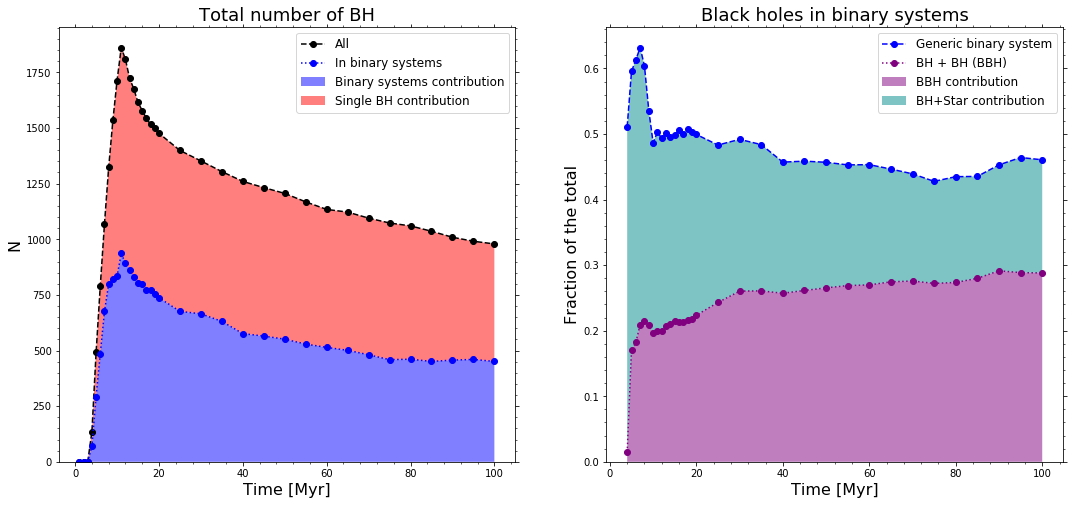

In [13]:
# cast to an array in order to use fancy indexing
# in the following plots
snap = np.array(snap)

#Plotting the data
fig, ax = plt.subplots(1,2,figsize=(18,8))

# Total number of black holes
ax[0].plot(snap, total_number, 'o--k', label = 'All')
ax[0].plot(snap, bin_bh_number, 'o:b', label = 'In binary systems')
ax[0].stackplot(snap, [bin_bh_number, sbh_number], colors = ['blue', 'red'], alpha = 0.5,
            labels = ['Binary systems contribution', 'Single BH contribution'])
# Setting the layout
axis_setting(ax[0], title = 'Total number of BH', xlabel = 'Time [Myr]',
             ylabel = 'N', legend = True)

# Fraction of binary sistems with a black holes
ax[1].plot(snap[total_number>0], bin_bh_perc[total_number>0], 'o--b', label = 'Generic binary system')
ax[1].stackplot(snap[total_number>0], [bbh_perc[total_number>0], bhs_perc[total_number>0]], colors = ['purple', 'darkcyan'], alpha = 0.5,
            labels = ['BBH contribution', 'BH+Star contribution'])
ax[1].plot(snap[total_number>0], bbh_perc[total_number>0], 'o:', label = 'BH + BH (BBH)', color = 'purple')
# Setting the layout
axis_setting(ax[1], title = 'Black holes in binary systems', xlabel = 'Time [Myr]',
             ylabel = 'Fraction of the total', legend = True)

plt.show()

The plot on the left shows the total number of black holes spotted in all the clusters at a given time (black line). The initial increase is probably due to the evolution of massive stars into black holes. We see that after $\sim 10$Myr it decreases as the simulation time increases; a possible reason that explains this behaviour is the expulsion of black holes from the clusters as the simulation goes on, as well as the possibility for binary black holes to merge.
Notice that in the right plot, we represented only points with non zero total number of black holes because those have a diverging fraction (`NaN`) which is meaningless.

In the right plot we can notice that, increasing time, the fraction of BBH becomes more prominent with respect to the contribution given by bh together with another star.

*Note:* by decreasing the snapshots number, some features of the above curves, e.g. the peak located around $\sim 10$Myr, weren't visible. This is one of the reasons due to which we chose to import data using the `snap` vector described previously.

### Black holes Mass Function

The black holes' mass function is the distribution of black holes' masses for a given snapshot, looking at data from different clusters. From its definition, the best way to present the function is by means of an histogram.

Two main characteristics have to be discuss are: binning choice and normalization.

There are a lot of methods to [choose the number of *bins*](https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width) in a histograms and these [are implemented](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges) in the `plt.hist()` method through Numpy's methods. One way to go is to select the option `bins = 'auto'` in order to let the method decide the best binning for our data.

This is a reasonable methodology, but it has two problems: first is that when comparing differend histograms for different snapshots the `'auto'` option gives us different binnings, and so it lead to a not-so-clear visual representation which makes it more difficult to compare variuos snapshots. On the other hand, the `'auto'` option is not compatible with the use of weights, implemented for the histograms' normalization (more details later on).

To avoid these, a fix number of bins is chosen for all histograms at different times. The methodology used to fix it is the following: given the `snap_fil` (note: this list is used instead of the original `snap` in order to plot only the most relevant mass functions), an histogram with `bins = 'auto'` is generated and the number of bins is recorded. Then, the fixed number of bins `n_bins` is taken as mean between the maximum and the minimum number of bins recorded. This is considered as representative for all mass functions. This isn't presented explicitly, but this methodology produce the following result: `n_bins = 32`.
Moreover, in order to have a clearer comparison between different snapshots, also the bins' edges are fixed taking the interval between the greatest bh's mass and the smallest one and divided by `n_bins`.

The *normalization* of the distributions is set to be the total number of black holes $N_{TOT}$, which is the sum of the numbers of single bhs and bhs contained in binary systems (note: in a generic binary, with either another bh or a star), at each snapshot. For each histogram, the total number for each category is displayed. Please, note that both single and binaries black holes plotted are normalized by $N_{TOT}$, hence all the fractions represented in the plot are with respect to $N_{TOT}$.

We use *stacked* histograms in order to emphasize the binary black holes contribution to the total mass function. For a clearer visualization, error bars are plotted only for the total number of black holes.

In the following we choose to use less snapshot with respect to the ones we have in total for presentation purposes. The user can choose the wanted snapshots by means of `wanted_snap`.


In [14]:
# Note: if a selected snapshot is not part of `snap`
# it won't be insert in snap_fil
wanted_snap = [5, 7, 10, 20, 50, 100]
snap_fil = [x for x in snap if x in wanted_snap]
print(f'The histograms will be plotted for the following instants of time: {snap_fil}')

# wanted indeces
wi = np.empty(len(wanted_snap), dtype=int)
for idx, wsn in enumerate(wanted_snap):
    wi[idx] = np.argwhere(snap == wsn)

The histograms will be plotted for the following instants of time: [5, 7, 10, 20, 50, 100]


In [15]:
# Searching for the minimum and maximum masses
# among all bh (single and binaries) and among all snapshots
max_mass = max(bh_singles['Mass'].max(),bh_binaries['Mass'].max())
min_mass = min(bh_singles['Mass'].min(),bh_binaries['Mass'].min())

# Defining bins' edges        
n_bins = 32
bin_edges = np.linspace(min_mass, max_mass, 32)
print(f'Min mass: {min_mass:.2f} solar masses\nMax mass: {max_mass:.2f} solar masses')

Min mass: 2.03 solar masses
Max mass: 143.28 solar masses


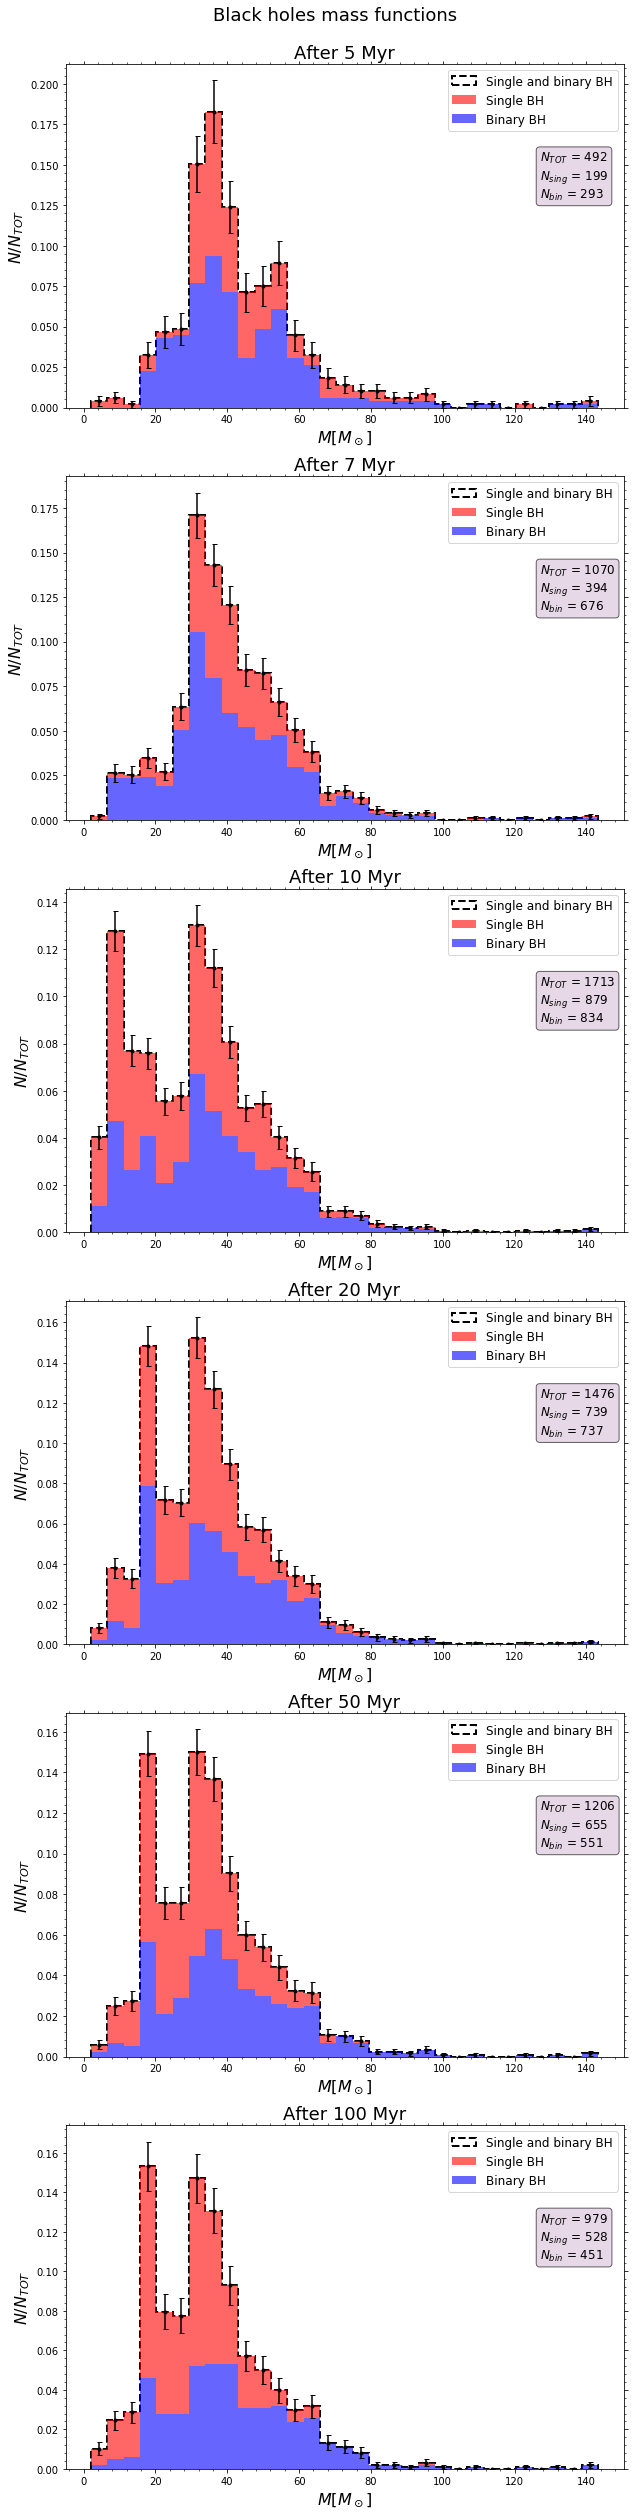

In [16]:
# Eventually close opened figures
plt.close()

# Creating a figure that will host all the subplots
fig = plt.figure(figsize = (10,40))

# Setting a global title
fig.suptitle('Black holes mass functions', fontsize = 18)
fig.subplots_adjust(top = 0.96) #for aesthetic purposes, to diminish the distance between plots and title

# Subplots containing the histograms of the mass functions, for each snapshot. 
for idx, sn in enumerate(snap_fil): # idx is an index to move among the subplots

    # Create the subplot and setting the title

    ax = plt.subplot(len(snap_fil), 1, idx + 1)

    # Concatenate the dataframes of singles and binaries BH, to plot them together
    bh_sin_bin = pd.concat([bh_singles[bh_singles['t']==sn],
                            bh_binaries[bh_binaries['t']==sn]])   

    
    # Plotting histograms

    # Histogram of both singles and binary BH
    n, b_edg, _ = plt.hist(bh_sin_bin['Mass'], bins = bin_edges, weights = (np.ones_like(bh_sin_bin['Mass']))/len(bh_sin_bin['Mass']),
                           histtype = 'step', color = 'k', linewidth = 2,  linestyle = 'dashed', label = 'Single and binary BH')
    
    # Poisson error
    poisson_error = np.sqrt(n/total_number[wi[idx]]) # n = frequencies
    bin_centres = 0.5*(b_edg[1:] + b_edg[:-1]) # bins centres
    plt.errorbar(x = bin_centres, y = n, yerr = poisson_error, capsize = 2.5, 
                 linestyle='none', marker = '.', color = 'k')

    # Stacked histogram of singles and binaries separately (notice: the previous histogram was NOT stacked!)
    # Notice the weights that are used: since they must have the same shape as the data, an array of the same
    # length of the respective data is created, and then is divided by the total number of data of the TOTAL
    # data (single + binary).    
    plt.hist([bh_binaries[bh_binaries['t'] == sn]['Mass'], bh_singles[bh_singles['t'] == sn]['Mass']],
             bins = bin_edges,
             weights = [np.ones_like(bh_binaries[bh_binaries['t'] == sn]['Mass'])/len(bh_sin_bin['Mass']),
                        np.ones_like(bh_singles[bh_singles['t'] == sn]['Mass'])/len(bh_sin_bin['Mass'])], 
             histtype = 'stepfilled', alpha = 0.6, stacked = True, linewidth = 2, 
             label = ['Binary BH','Single BH'], color = ['blue', 'red'], linestyle = 'dashed')

    # textbox with total numbers (to better interpret normalized histograms)
    props = dict(boxstyle='round', facecolor='thistle', alpha=0.6)
    txt = "$N_{{TOT}}$ = {}\n$N_{{sing}}$ = {}\n$N_{{bin}}$ = {}".format(int(total_number[wi[idx]]),
                                                                         int(sbh_number[wi[idx]]),
                                                                         int(bin_bh_number[wi[idx]]),
                                                                         fontsize=12)
    plt.text(0.85,0.61,txt,transform=ax.transAxes,fontsize=12,bbox=props)

    # Using the function defined above to set the layout
    axis_setting(ax, title='After {} Myr'.format(str(sn)), xlabel='$M [M_\odot]$', 
                  ylabel='$N / N_{TOT}$', legend=True)

We can notice two peaks in the distribution after $\sim 10$ Myr for both the binary mass function and the total mass function. These distributions, at each snapshot, share the same profile. Moreover for times greater that $10$ Myr, even if the statistics is low, we observe that the more massive black holes are the ones in a binary system and that can be explained with the fact that more massive black holes are more likely to take part in a binary system (see BBH analysis).

In the following plot we display on the same figure the mass histograms coming from all the snapshots. In this way we may qualitatively study the evolution of the mass function as a function of time.

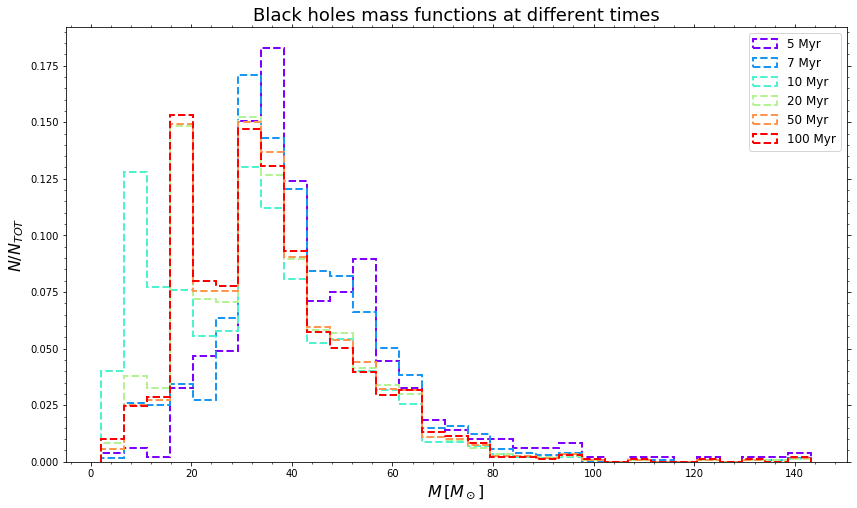

In [80]:
# Eventually close opened figures
plt.close()

# Creating the figure
fig, ax = plt.subplots(1,1,figsize = (14, 8))

# Set different colors for each histogram
color = plt.cm.rainbow(np.linspace(0, 1, len(snap_fil)))

# Plot histograms of the mass functions, for each snapshot
for idx, sn in enumerate(snap_fil):
    
    # Concatenate the dataframes of singles and binaries BH, to plot them together
    bh_sin_bin = pd.concat([bh_singles[bh_singles['t']==sn] ,bh_binaries[bh_binaries['t']==sn]])
    
    # Histogram:
    # Setting the color and plotting the histogram
    ax.hist(bh_sin_bin['Mass'], bins = bin_edges, 
            weights = (np.ones_like(bh_sin_bin['Mass']))/len(bh_sin_bin['Mass']),
            histtype = 'step', color = color[idx], linewidth = 2,  linestyle = 'dashed', 
            label = '{} Myr'.format(str(sn)))

# Setting histogram subplot layout
axis_setting(axis=ax, title='Black holes mass functions at different times',
            xlabel='$M\,[M_\odot]$', ylabel='$N / N_{TOT}$', legend=True)

We notice that in the first $10$ Myr we have an increasing number of bh for masses below $30 M_\odot$, with the rising of a second peak different from the one displayed by all snapshots at around $40 M_\odot$. After $20$ Myr, the shape of the mass function stabilizes. 

### Binary Black Holes's origin

For a dense astronomical landscape, i.e. with density $> 1000$ stars per pc$^3$, such as the ones simulated in the dataset in our possesion, binary black holes (BBH) can be of two types:
1. *Primordial binaries*, i.e. derived from two massive stars in a binary system which evolve together and both become black holes;
2. BBH formed as a consequence of *dynamical exchanges*, i.e. three-body encounters during which one of the former members of the binary is replaced by the intruder (see chapter 4.3 of "Astrophysics of stellar black holes", M. Mapelli).

The criterion to distinguish these two categories is given by how NBody6++GPU encodes information about bodies: if values of the variable `NAME` for the two bodies composing a binary are consecutive, then the two constitute a primordial binariy (this means that they were initialized sequentially and they remained bound, eventually becoming a couple of black holes). Otherwise, the BBH was formed through dynamical exchange.

In [18]:
# Note: the series 'NAMEX', X=1,2, has dtype=int64, hence the == operator can be safely used

# Taking Primordial binaries
bbh_primordial = bbh.query('NAME1 == NAME2 + 1 | NAME1 == NAME2 - 1')
# Taking dynamical exchanged binaries
bbh_dy_exch = bbh.query('NAME1 != NAME2 + 1 & NAME1 != NAME2 - 1')

### Evolution of BBH populations

Here we plot the number of BBH systems of both types as functions of time. Then we plot the histograms of the BBHs' total mass at each time of acquisition, distinguishing between BBHs of the two types.

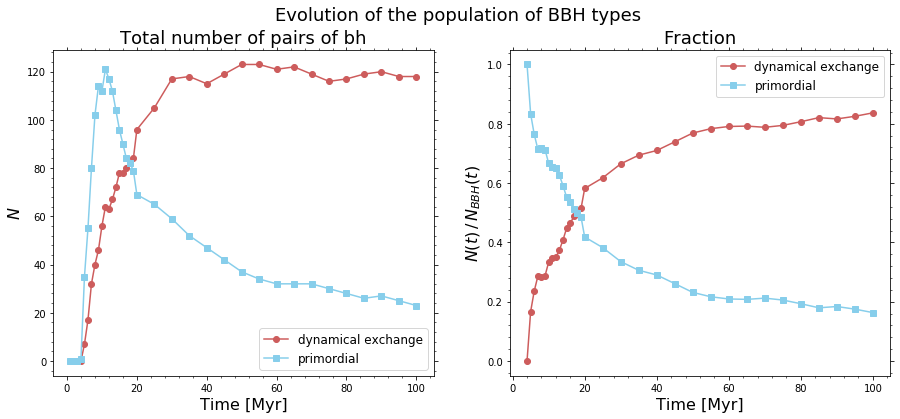

In [78]:
# Collecting number of BBH for both categories
bbh_dy_evolution = []
bbh_pr_evolution = []
for sn in snap:
    # choosing BBH for snapshot sn, then take the total number
    temp1 = len(bbh_dy_exch[bbh_dy_exch['t'] == sn].index)
    temp2 = len(bbh_primordial[bbh_primordial['t'] == sn].index)
    bbh_dy_evolution.append(temp1)
    bbh_pr_evolution.append(temp2)    

# Computing fractions taking care of possible divisions by 0
with np.errstate(divide='ignore', invalid='ignore'): 
    # dynamical exchange-formed BBH's fraction
    # the 1/2 factor is used because bbh_number gives the number of
    # bh in a bbh, not the number of pairs.
    bbh_dy_frac = np.divide(bbh_dy_evolution, bbh_number/2)
    # primordial BBH's fraction
    bbh_pr_frac = np.divide(bbh_pr_evolution, bbh_number/2)
    
# Number of BBH for snapshot
plt.close()
fig,ax = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Evolution of the population of BBH types',fontsize=18)
ax[0].plot(snap, bbh_dy_evolution, '-o', label='dynamical exchange', color='indianred')
ax[0].plot(snap, bbh_pr_evolution, '-s', label='primordial', color = 'skyblue')
ax[1].plot(snap[bbh_number>0], bbh_dy_frac[bbh_number>0], '-o', label='dynamical exchange', color='indianred')
ax[1].plot(snap[bbh_number>0], bbh_pr_frac[bbh_number>0], '-s', label='primordial', color = 'skyblue')

# Setting the layout of the plot
axis_setting(ax[0], title = 'Total number of pairs of bh', xlabel = 'Time [Myr]',
           ylabel = '$N$', legend = True)
axis_setting(ax[1], title = 'Fraction', xlabel = 'Time [Myr]',
           ylabel = '$N(t)\, /\, N_{{BBH}}(t)$', legend = True)
plt.show()

Notice that, in the right panel of the above figure, we represented the fraction of BBHs of each type; the denominator of such fraction is the total number of BBHs at the corresponding time.

In the above figure (left panel), we can see that the number of primordial BBHs rapidly increases for the first $\sim 10$ Myr; the mechanism which is responsible for this is the evolution of stars already contained in a binary system, which transform into black holes (or, of course, the evolution of a star which is already coupled with a black hole). After this increase, such number decreases with time. We can hypothesize that this occurs due to events of dynamical exchange which transform primordial BBH in dynamical exchange-formed ones; alternatively, this may be due to merging events of two black holes or due to the expulsion of black holes from the cluster.

On the other hand, the number of BBHs originated by dynamical exchange increases with time and seems to stabilize to a constant value.

From the right panel, it is clear that the fraction of primordial BBHs is predominant at small times, but eventually is surpassed by the fraction of BBHs formed by dynamical exchange. The crossing occurs slightly before $\sim 20$ Myr.

In the following, as we anticipated, we plot the mass functions of the BBHs' total mass, treating the two types of BBHs separately. We chose a number of representative times; at each of them, we plot the two histograms. Each of them is normalized to the total number of BBHs of the corresponding type, i.e. the primordial BBHs' histogram has the total number of primordial BBHs (at the relevant time) as normalization factor, while the histogram of BBHs formed by dynamical exchange has the total number of such BBHs (again, at the relevant time) as normalization factor.

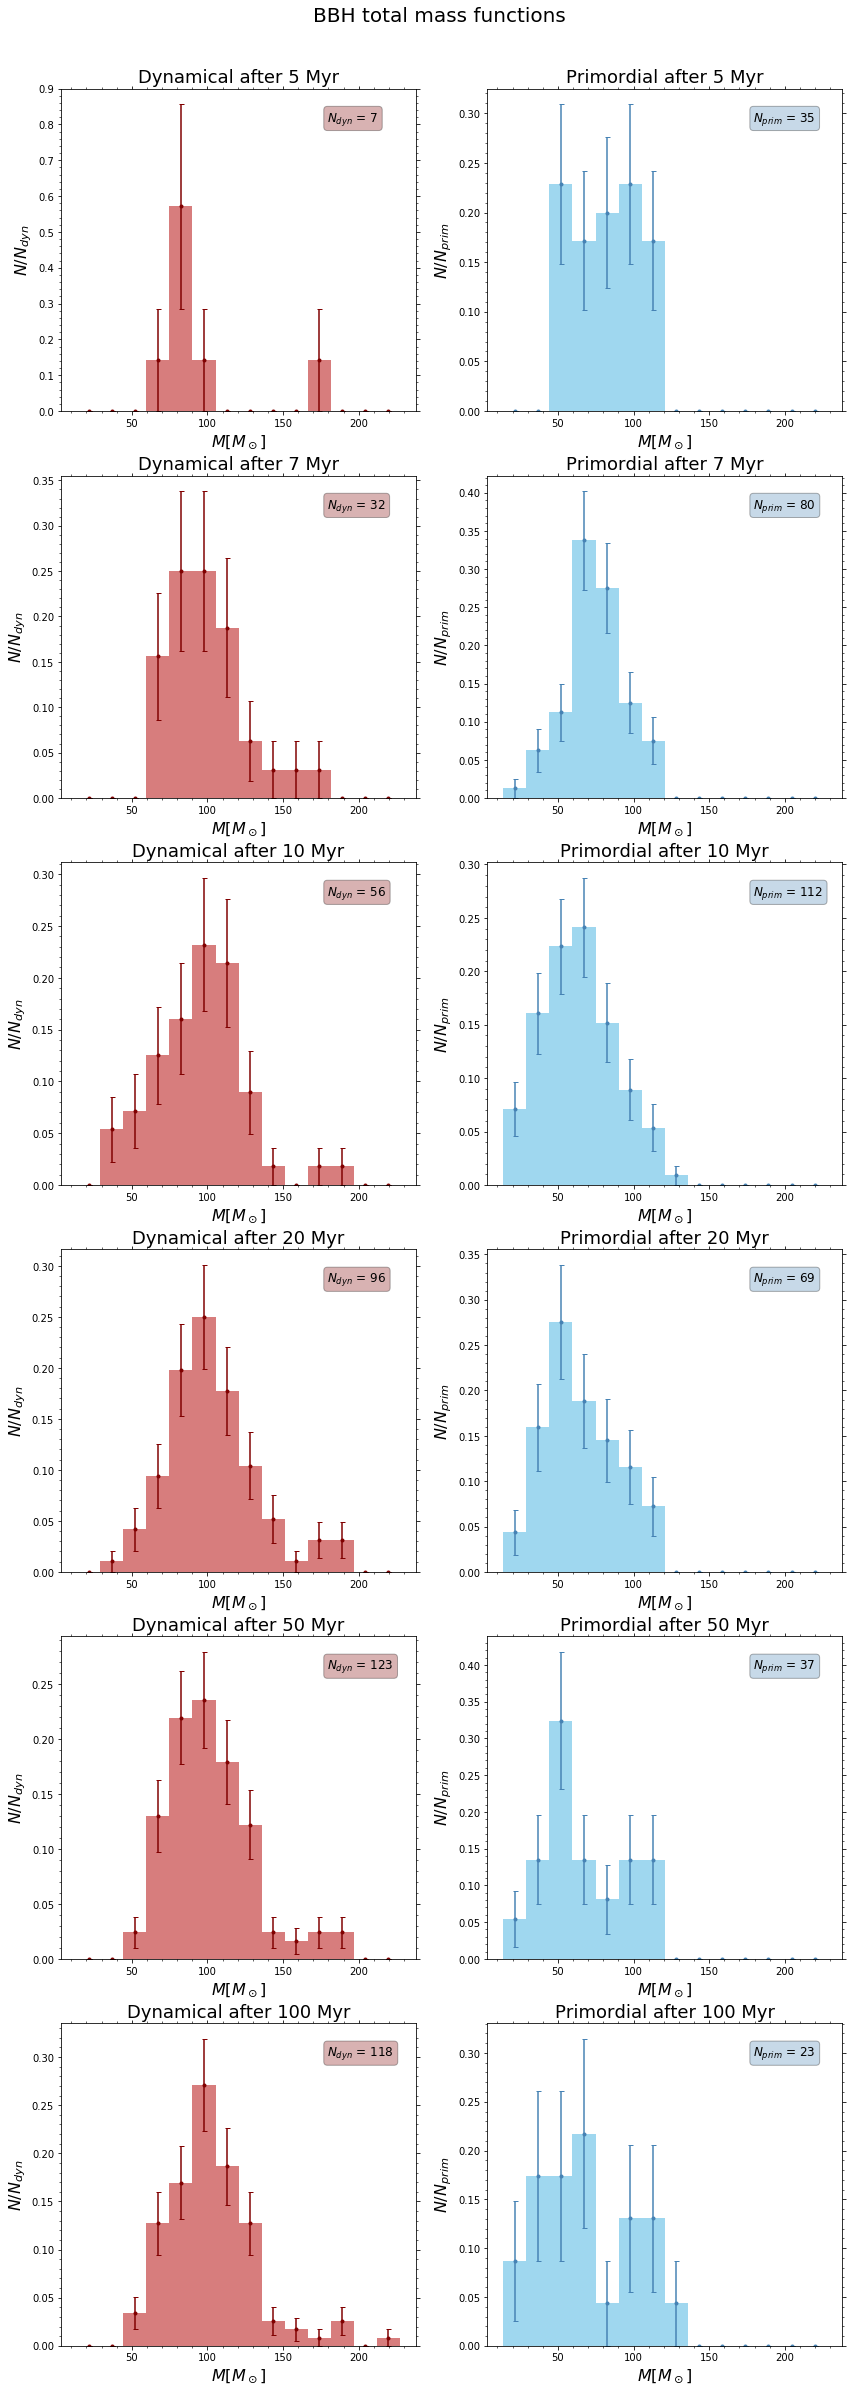

In [77]:
plt.close()

# Following the same procedure used for the previous histograms
max_mass_bbh = (bbh['M1[M]'] + bbh['M2[M]']).max()
min_mass_bbh = (bbh['M1[M]'] + bbh['M2[M]']).min()
n_bins_bbh = 15
bin_edges_bbh = np.linspace(min_mass_bbh, max_mass_bbh, n_bins_bbh)

# Creating figure and axis objects
fig, ax = plt.subplots(len(snap_fil), 2, figsize=(14,38))

# Setting a global title
fig.suptitle('BBH total mass functions', fontsize = 20)
fig.subplots_adjust(top = 0.95) #for aesthetic purposes, to diminish the distance between plots and title


# Subplots containing the histograms of the mass functions, for each snapshot. 
for idx, sn in enumerate(snap_fil): # idx is an index to move among the subplots
    
    # Calculate total mass of BBHs of both types, at current time
    total_mass_dy = bbh_dy_exch[bbh_dy_exch['t'] == sn]['M1[M]'] + bbh_dy_exch[bbh_dy_exch['t'] == sn]['M2[M]']
    total_mass_pr = bbh_primordial[bbh_primordial['t'] == sn]['M1[M]'] + bbh_primordial[bbh_primordial['t'] == sn]['M2[M]']
    
    # Plotting histograms
    counts_dy, bin_edges_dy, _ = ax[idx][0].hist(total_mass_dy, bins=bin_edges_bbh, alpha=.8,
                                                 weights = (np.ones_like(total_mass_dy))/len(total_mass_dy),
                                                 color = 'indianred')
    

    counts_pr, bin_edges_pr, _ = ax[idx][1].hist(total_mass_pr, bins=bin_edges_bbh, alpha=.8,
                                                 weights = (np.ones_like(total_mass_pr))/len(total_mass_pr),
                                                 color = 'skyblue')
    
    # Poisson error dynamical
    poisson_error_dy = np.sqrt(counts_dy/len(total_mass_dy))
    bin_centres_dy = 0.5*(bin_edges_dy[1:] + bin_edges_dy[:-1]) # bins centres
    ax[idx][0].errorbar(x = bin_centres_dy, y = counts_dy, yerr = poisson_error_dy, capsize = 2.5, 
                 linestyle='none', marker = '.', color = 'maroon')

    # Poisson error primordial
    poisson_error_pr = np.sqrt(counts_pr/len(total_mass_pr))
    bin_centres_pr = 0.5*(bin_edges_pr[1:] + bin_edges_pr[:-1]) # bins centres
    ax[idx][1].errorbar(x = bin_centres_pr, y = counts_pr, yerr = poisson_error_pr, capsize = 2.5, 
                 linestyle='none', marker = '.', color = 'steelblue')
    
    # Setting the layouts of the plots
    axis_setting(ax[idx][0], title = 'Dynamical after {} Myr'.format(str(sn)), xlabel = '$M [M_\odot]$',
             ylabel = '$N / N_{dyn}$', legend = False)
    axis_setting(ax[idx][1], title = 'Primordial after {} Myr'.format(str(sn)), xlabel = '$M [M_\odot]$',
             ylabel = '$N / N_{prim}$', legend = False)
    
    # textbox with total numbers (to better interpret normalized histograms)
    props_dy = dict(boxstyle='round', facecolor='maroon', alpha=0.3)
    props_pr = dict(boxstyle='round', facecolor='steelblue', alpha=0.3)
    txt_dy = "$N_{{dyn}}$ = {}".format(int(len(total_mass_dy)))
    txt_pr = "$N_{{prim}}$ = {}".format(int(len(total_mass_pr)))
    ax[idx][0].text(0.75,0.9, txt_dy, transform=ax[idx][0].transAxes, fontsize=12, bbox=props_dy)
    ax[idx][1].text(0.75,0.9, txt_pr, transform=ax[idx][1].transAxes, fontsize=12, bbox=props_pr)

We can notice that, in each snapshot, primordial BBH are on average less massive than those formed by dynamical exchange, as pointed out in M. Mapelli's review on the topic, which is listed in the "References" section.

## References

[1] Official Documentation of NBody6++GPU, available [here](https://github.com/nbodyx/Nbody6ppGPU/tree/master/doc)

[2] Video by A. Geller, Northwestern University. Video available [here](http://faculty.wcas.northwestern.edu/aaron-geller/visuals.html)

[3] "Astrophysics of stellar black holes" by M. Mapelli, available in [ArXiv](https://arxiv.org/abs/1809.09130)